In [1]:
from wyvern.performance.takeoff import prop_thrust, ground_roll_sweep, takeoff_distance
from wyvern.data.propellers import PROP_10X5, PROP_8X8, PROP_9X6
from wyvern.performance.models import QuadraticLDModel
import numpy as np

# parmeters
mass = 1.63 # kg
v_max = 9.0 # m/s
aero_model = QuadraticLDModel(c_d0=0.02959, e_inviscid=0.95, K=0.45, aspect_ratio=5.106458)
mu = 0.1    # ground friction coefficient
CLgr = -0.07964 # zero incidence on ground
thrust_model = prop_thrust(PROP_9X6)

def vs_from_v_hw(v_hw: float) -> tuple[np.ndarray, np.ndarray]:
    # calculate takeoff distance
    v_series, s_series = ground_roll_sweep(v_hw=v_hw, v_max=v_max, mass=mass, mu=mu, CLgr=CLgr, thrust_model=thrust_model, aero_model=aero_model)
    s_to = takeoff_distance(v_hw=v_hw, v_lo=8.05, mass=mass, mu=mu, CLgr=CLgr, thrust_model=thrust_model, aero_model=aero_model)
    print(f'Takeoff distance: {s_to:.2f} m = {s_to*3.281:.2f} ft')
    return v_series, s_series

In [2]:
# compute v and s series
v_hw_vals = [0, 1, 2, 3]
v_series, s_series = zip(*[vs_from_v_hw(v) for v in v_hw_vals])

C:\Users\mdsup\Documents\GitHub\wyvern\wyvern\performance\takeoff.py:109: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(integrand, v_hw, v_lo)[0]
C:\Users\mdsup\Documents\GitHub\wyvern\wyvern\performance\takeoff.py:109: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(integrand, v_hw, v_lo)[0]


Takeoff distance: 9.52 m = 31.23 ft
Takeoff distance: 7.44 m = 24.40 ft
Takeoff distance: 5.59 m = 18.36 ft
Takeoff distance: 3.99 m = 13.10 ft


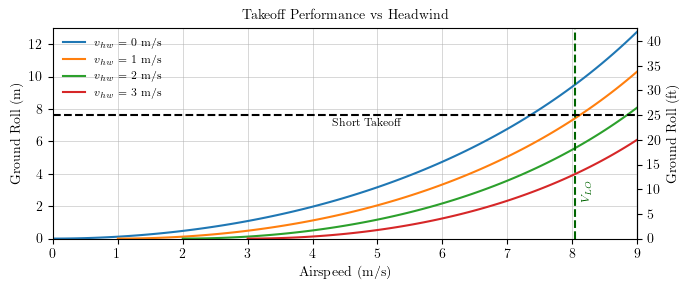

In [8]:
from matplotlib import pyplot as plt
from matplotlib import rcParams

rcParams["text.usetex"] = True
# use computer modern serif font for all text
rcParams["font.family"] = "serif"
# plt.style.use("dark_background")

plt.figure(figsize=(7,3))

for i, v_hw in enumerate(v_hw_vals):
    plt.plot(v_series[i], s_series[i], label="$v_{hw}$" + f" = {v_hw} m/s")
plt.axvline(8.05, color="darkgreen", linestyle="--", label="_")
plt.text(8.15, 2.2, "$V_{LO}$", fontsize=8, color="darkgreen", ha="left", va="bottom", rotation=90)
plt.axhline(7.62, color="black", linestyle="--", label="_")
plt.text(4.3, 7.42, "Short Takeoff", fontsize=8, color="black", ha="left", va="top")
ax_ft = plt.gca().secondary_yaxis('right', functions=(lambda x: x*3.281, lambda x: x/3.281))
ax_ft.set_ylabel("Ground Roll (ft)")
ax_ft.set_yticks(np.arange(0, 45, 5))
plt.xlabel("Airspeed (m/s)")
plt.ylabel("Ground Roll (m)")
plt.grid(linewidth=0.5, alpha=0.7)
plt.title("Takeoff Performance vs Headwind", fontsize=10)
plt.tight_layout()
plt.ylim(0, 13)
plt.xlim(0, v_max)
plt.xticks(np.arange(0, v_max+1, 1))
plt.legend(fontsize=8, frameon=False, loc="upper left")
plt.savefig("takeoff_distance.pdf", bbox_inches="tight")  

